#Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Load Dataset

In [ ]:
df = pd.read_csv("data.csv", sep=';')
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


#Dataset Structure

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49189 entries, 0 to 49188
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   49189 non-null  object 
 1   Time                   49189 non-null  object 
 2   Global_active_power    49189 non-null  object 
 3   Global_reactive_power  49189 non-null  object 
 4   Voltage                49188 non-null  object 
 5   Global_intensity       49188 non-null  object 
 6   Sub_metering_1         49188 non-null  object 
 7   Sub_metering_2         49188 non-null  object 
 8   Sub_metering_3         49183 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


#Created Timestamp

In [ ]:
df['timestamp'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    dayfirst=True,
    errors='coerce'
)


In [ ]:
df['timestamp'].isnull().sum()


np.int64(0)

In [ ]:
df = df.dropna(subset=['timestamp'])


#set time stamp as index

In [ ]:
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.set_index('timestamp', inplace=True)


#handle missing

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(method='ffill')


/tmp/ipython-input-2692137436.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49189 entries, 2006-12-16 17:24:00 to 2007-01-19 21:12:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49189 non-null  float64
 1   Global_reactive_power  49189 non-null  float64
 2   Voltage                49189 non-null  float64
 3   Global_intensity       49189 non-null  float64
 4   Sub_metering_1         49189 non-null  float64
 5   Sub_metering_2         49189 non-null  float64
 6   Sub_metering_3         49189 non-null  float64
dtypes: float64(7)
memory usage: 3.0 MB


#Resample data

In [ ]:
hourly_df = df.resample('H').mean()
hourly_df.head()


/tmp/ipython-input-3444388998.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df.resample('H').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [ ]:
hourly_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 821 entries, 2006-12-16 17:00:00 to 2007-01-19 21:00:00
Freq: h
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    821 non-null    float64
 1   Global_reactive_power  821 non-null    float64
 2   Voltage                821 non-null    float64
 3   Global_intensity       821 non-null    float64
 4   Sub_metering_1         821 non-null    float64
 5   Sub_metering_2         821 non-null    float64
 6   Sub_metering_3         821 non-null    float64
dtypes: float64(7)
memory usage: 51.3 KB


#visualize

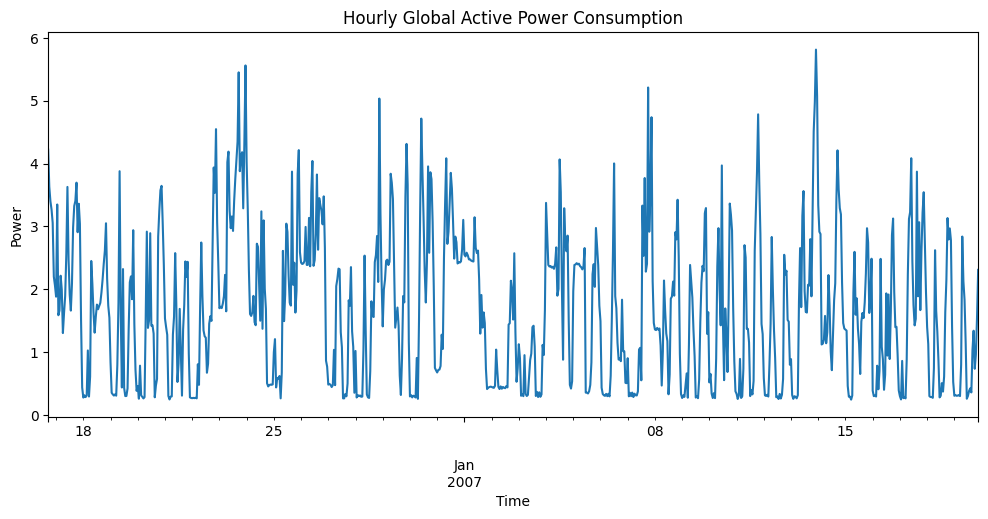

In [ ]:
hourly_df['Global_active_power'].plot(figsize=(12,5))
plt.title("Hourly Global Active Power Consumption")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()


#scale features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_hourly = scaler.fit_transform(hourly_df)

scaled_hourly_df = pd.DataFrame(
    scaled_hourly,
    index=hourly_df.index,
    columns=hourly_df.columns
)


#Split data

In [ ]:
train_size = int(len(scaled_hourly_df) * 0.8)

train = scaled_hourly_df.iloc[:train_size]
test = scaled_hourly_df.iloc[train_size:]


#save data

In [ ]:
train.to_csv("train_hourly.csv")
test.to_csv("test_hourly.csv")


#summary

In [ ]:
df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,49189.000000,49189.000000,49189.000000,49189.000000,49189.000000,49189.000000,49189.000000
mean,1.678775,0.136565,241.045063,7.098530,1.109069,1.922645,7.260099
std,1.351260,0.119004,3.590618,5.686932,6.203352,7.779056,8.627369
min,0.194000,0.000000,226.320000,0.800000,0.000000,0.000000,0.000000
25%,0.396000,0.000000,238.620000,1.800000,0.000000,0.000000,0.000000
50%,1.432000,0.128000,241.310000,6.000000,0.000000,0.000000,0.000000
75%,2.458000,0.202000,243.600000,10.200000,0.000000,1.000000,17.000000
max,9.272000,0.862000,251.700000,40.400000,77.000000,78.000000,20.000000


In [ ]:
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])
print("Start time:", df.index.min())
print("End time:", df.index.max())


Total rows: 49189
Total columns: 7
Start time: 2006-12-16 17:24:00
End time: 2007-01-19 21:12:00


#outliers (detect and visualize)

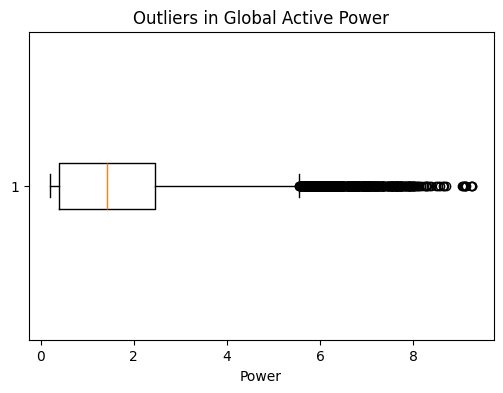

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Global_active_power'], vert=False)
plt.title("Outliers in Global Active Power")
plt.xlabel("Power")
plt.show()


In [ ]:
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df['Global_active_power'] < lower_bound) |
    (df['Global_active_power'] > upper_bound)
]

print("Number of outliers:", outliers.shape[0])


Number of outliers: 673


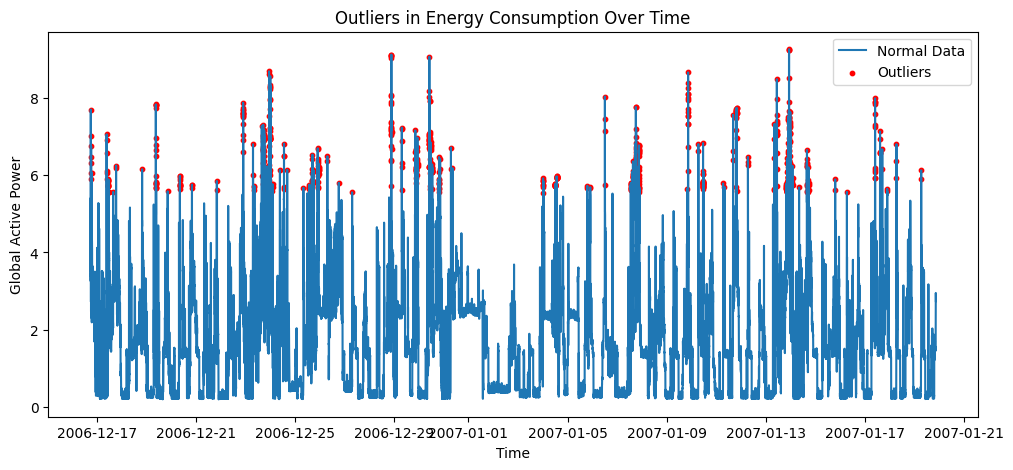

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Global_active_power'], label='Normal Data')
plt.scatter(outliers.index, outliers['Global_active_power'],
            color='red', s=10, label='Outliers')
plt.legend()
plt.title("Outliers in Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Global Active Power")
plt.show()


#final summary

In [ ]:
print("DATA SUMMARY")
print("-------------")
print("Total samples:", df.shape[0])
print("Features:", list(df.columns))
print("Outliers detected (Global_active_power):", outliers.shape[0])


DATA SUMMARY
-------------
Total samples: 49189
Features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
Outliers detected (Global_active_power): 673
